# Những thư viện cần thiết

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import os

# Data + Visualize

In [17]:
df = pd.read_csv('../Recommend_size/newdata.csv')

In [18]:
df

,height,weight,age,gender,length_back,chest,size,ngang_vai,vong_eo
0,176.000000,77.000000,20,female,75.5,110,XL,56,120
1,172.600000,83.800000,25,male,76.5,116,2XL,58,126
2,172.000000,58.000000,26,male,73.5,104,L,54,114
3,153.000000,49.000000,45,male,69.5,92,S,50,104
4,150.000000,47.000000,48,male,69.5,92,S,50,104
...,...,...,...,...,...,...,...,...,...
195,167.157111,55.547436,44,male,71.5,98,M,50,109
196,159.554906,43.203956,18,male,69.5,92,S,48,104
197,149.239542,46.161654,48,male,69.5,92,S,50,103
198,167.865575,60.900944,41,male,73.5,104,L,55,112


In [19]:
# Tính BMI
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)

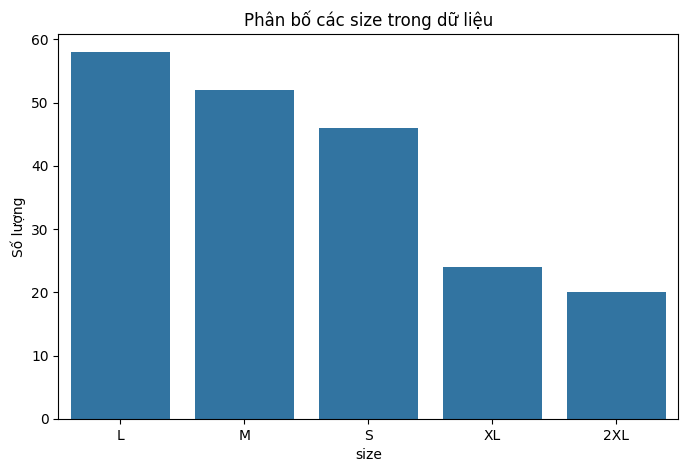

In [20]:
# ===== 1️⃣ Phân bố các size =====
plt.figure(figsize=(8,5))
sns.countplot(x='size', data=df, order=df['size'].value_counts().index)
plt.title("Phân bố các size trong dữ liệu")
plt.ylabel("Số lượng")
plt.xlabel("size")
plt.show()

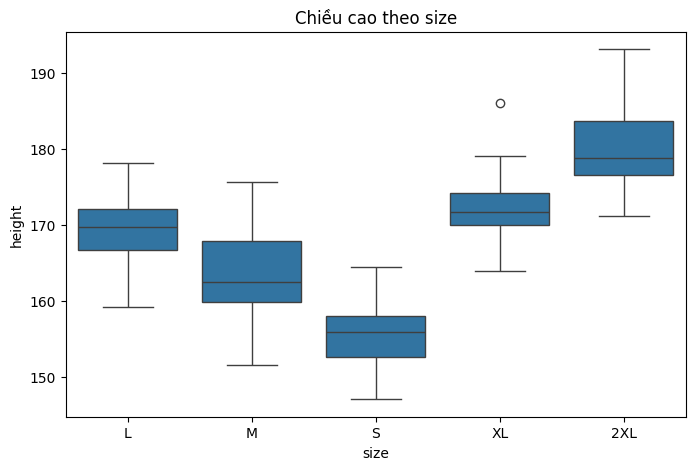

In [21]:
# ===== 2️⃣ Boxplot chiều cao theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='height', data=df, order=df['size'].value_counts().index)
plt.title("Chiều cao theo size")
plt.show()

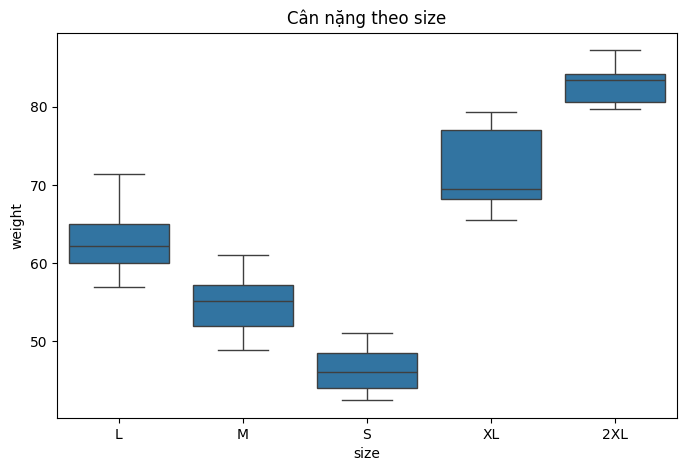

In [22]:
# ===== 3️⃣ Boxplot cân nặng theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='weight', data=df, order=df['size'].value_counts().index)
plt.title("Cân nặng theo size")
plt.show()

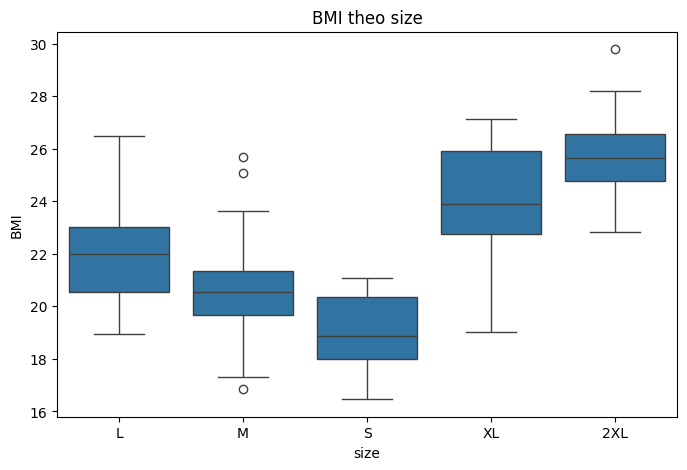

In [23]:
# ===== 4️⃣ Boxplot BMI theo size =====
plt.figure(figsize=(8,5))
sns.boxplot(x='size', y='BMI', data=df, order=df['size'].value_counts().index)
plt.title("BMI theo size")
plt.show()

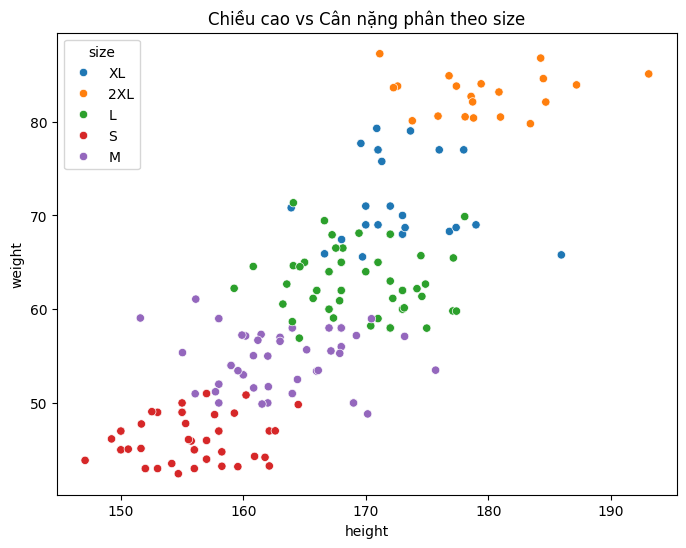

In [24]:
# ===== 5️⃣ Scatterplot chiều cao vs cân nặng =====
plt.figure(figsize=(8,6))
sns.scatterplot(x='height', y='weight', hue='size', data=df)
plt.title("Chiều cao vs Cân nặng phân theo size")
plt.show()

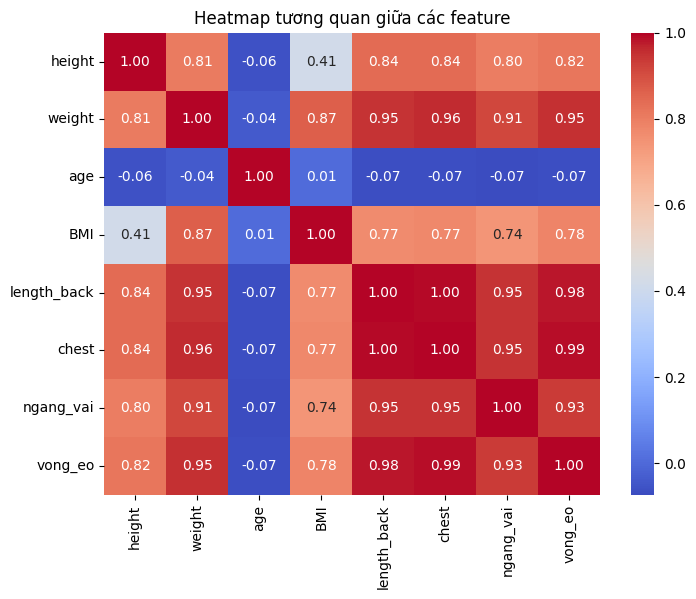

In [25]:
# ===== 6️⃣ Heatmap tương quan các feature =====
plt.figure(figsize=(8,6))
corr = df[['height', 'weight', 'age', 'BMI','length_back','chest','ngang_vai','vong_eo']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap tương quan giữa các feature")
plt.show()

In [26]:
# # ===== 7️⃣ Kiểm tra Outliers bằng Boxplot =====

# # Hàm vẽ boxplot cho từng cột số để phát hiện outlier
# def plot_box(column):
#     plt.figure(figsize=(6,4))
#     sns.boxplot(y=df[column])
#     plt.title(f"Outliers trong {column}")
#     plt.show()

# for col in ['height', 'weight', 'age', 'BMI']:
#     plot_box(col)

# Compare model


==== Random Forest ====
Accuracy: 1.00
F1 macro: 1.00

==== KNN (k=5) ====
Accuracy: 0.95
F1 macro: 0.95


c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\chuon\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [17:39:37] WARNING: C:\acti


==== Logistic Regression ====
Accuracy: 1.00
F1 macro: 1.00

==== CatBoost ====
Accuracy: 1.00
F1 macro: 1.00

==== XGBoost ====
Accuracy: 1.00
F1 macro: 1.00
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 9
[LightGBM] [Info] Start training from score -2.367124
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.437588
[LightGBM] [Info] Start training from score -2.130735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

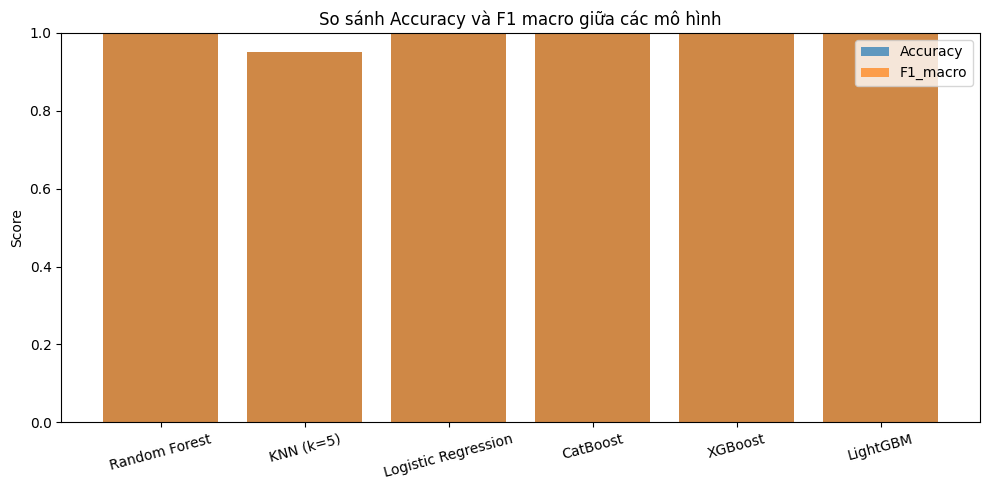

In [27]:
# Encode nhãn size
le = LabelEncoder()
df['size_encoded'] = le.fit_transform(df['size'])

# Encode gender
df['gender'] = df['gender'].map({'male': 1, 'female': 0})

# Tập features
X = df[['height', 'weight', 'age', 'gender', 'length_back', 'chest', 'ngang_vai', 'vong_eo', 'BMI']]
y = df['size_encoded']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Khởi tạo các mô hình
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'CatBoost': CatBoostClassifier(iterations=300, depth=4, learning_rate=0.05, verbose=0, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
}

results = {"Model": [], "Accuracy": [], "F1_macro": []}

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    if name == 'CatBoost':
        model.fit(X_train, y_train, cat_features=[3])
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["F1_macro"].append(f1)
    print(f"\n==== {name} ====")
    print(f"Accuracy: {acc:.2f}")
    print(f"F1 macro: {f1:.2f}")

# Vẽ biểu đồ
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["Accuracy"], label="Accuracy", alpha=0.7)
plt.bar(results_df["Model"], results_df["F1_macro"], label="F1_macro", alpha=0.7)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("So sánh Accuracy và F1 macro giữa các mô hình")
plt.xticks(rotation=15)
plt.legend()
plt.tight_layout()
plt.savefig("model_comparison.png")
plt.show()

# Model CatBoost

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
import joblib
from catboost import CatBoostClassifier
import os

# 1️⃣ Load dữ liệu
DATA_PATH = "../Recommend_size/newdata.csv"
df = pd.read_csv(DATA_PATH)

# 2️⃣ Feature engineering: Tính BMI
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)


# 4️⃣ Encode label size
le = LabelEncoder()
df['size_encoded'] = le.fit_transform(df['size'])

# 5️⃣ Chuyển gender về dạng string để CatBoost xử lý dạng categorical
df['gender'] = df['gender'].astype(str)

# 6️⃣ Tạo tập train/test với tất cả các feature
X = df[['height', 'weight', 'age', 'gender', 'length_back', 'chest', 'ngang_vai', 'vong_eo', 'BMI']]
y = df['size_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7️⃣ Huấn luyện model
model = CatBoostClassifier(
    iterations=300,
    depth=4,
    learning_rate=0.05,
    random_state=42,
    verbose=0
)

model.fit(X_train, y_train, cat_features=['gender'])

# 8️⃣ Đánh giá model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print("✅ CatBoost training completed.")
print(f"📊 Accuracy: {acc:.2f}")
print(f"📊 F1 score (macro): {f1:.2f}")
print("📋 Classification Report:")
print(classification_report(
    y_test, y_pred,
    labels=np.unique(y_test),
    target_names=le.inverse_transform(np.unique(y_test))
))

# 9️⃣ Lưu model, label encoder và dữ liệu đã xử lý
output_dir = "E:/AIFSHOP/Recommend_size"
os.makedirs(output_dir, exist_ok=True)

model.save_model(os.path.join(output_dir, "catboost_pipeline_model_final.cbm"))
joblib.dump(le, os.path.join(output_dir, "catboost_pipeline_label_encoder_final.pkl"))
df.to_csv(os.path.join(output_dir, "cleaned_dataset_catboost_final.csv"), index=False)

print("✅ Model, label encoder và cleaned dataset đã được lưu vào thư mục Recommend_size.")


✅ CatBoost training completed.
📊 Accuracy: 1.00
📊 F1 score (macro): 1.00
📋 Classification Report:
              precision    recall  f1-score   support

         2XL       1.00      1.00      1.00         5
           L       1.00      1.00      1.00        10
           M       1.00      1.00      1.00        12
           S       1.00      1.00      1.00         8
          XL       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

✅ Model, label encoder và cleaned dataset đã được lưu vào thư mục Recommend_size.


In [29]:
# 10️⃣ Lưu log train model vào CSV
log_file = os.path.join(output_dir, "training_log.csv")

# Tạo DataFrame log
log_data = {
    "accuracy": [acc],
    "f1_macro": [f1]
}

# Thêm từng class vào log
report = classification_report(
    y_test, y_pred,
    labels=np.unique(y_test),
    target_names=le.inverse_transform(np.unique(y_test)),
    output_dict=True
)

# Thêm accuracy, precision, recall, f1 cho từng class
for class_name, metrics in report.items():
    if class_name not in ["accuracy", "macro avg", "weighted avg"]:
        log_data[f"{class_name}_precision"] = [metrics['precision']]
        log_data[f"{class_name}_recall"] = [metrics['recall']]
        log_data[f"{class_name}_f1"] = [metrics['f1-score']]

# Chuyển sang DataFrame và lưu
log_df = pd.DataFrame(log_data)
log_df.to_csv(log_file, index=False)

print(f"✅ Training log đã được lưu vào {log_file}")


✅ Training log đã được lưu vào E:/AIFSHOP/Recommend_size\training_log.csv
